In [1]:
import matplotlib.pyplot as plt
import torch

import sys
sys.path.append("../")

from prototype.user_profile_host import UserProfileHost
from prototype.constants import RecommendationType

/home/phahn/venvs/mmll/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [20]:
# Fit TSNE Representation Module from sklearn
toy_uph = UserProfileHost(original_prompt='test', recommendation_type=RecommendationType.WEIGHTED_AXES, cache_dir='../cache/')

# Run a few iterations to gather some points
for i in range(100):
    embeds, latents = toy_uph.generate_recommendations(num_recommendations=5)
    scores = torch.rand(size=(5,))
    toy_uph.fit_user_profile(preferences=scores)

Loading pipeline components...: 100%|██████████| 7/7 [00:00<00:00, 10.10it/s]


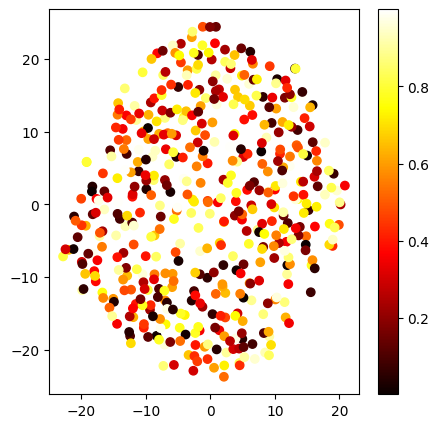

In [21]:
low_d_user_profile, low_d_embeddings, preferences = toy_uph.plotting_utils(algorithm='tsne')

# PLot Embeddings with respective scores
cmap = plt.get_cmap('hot')
fig = plt.figure(figsize=(5,5))
p = plt.scatter(low_d_embeddings[:, 0], low_d_embeddings[:, 1], c=preferences, cmap=cmap)
plt.colorbar(mappable=p)
plt.show()

In [ ]:
# TODO (Paul @ Klara): Hier dein Testbereich :)

low_d_user_profile, low_d_embeddings, preferences = toy_uph.plotting_utils(algorithm='pca')

# PLot Embeddings with respective scores
cmap = plt.get_cmap('hot')
fig = plt.figure(figsize=(5,5))
p = plt.scatter(low_d_embeddings[:, 0], low_d_embeddings[:, 1], c=preferences, cmap=cmap)
plt.colorbar(mappable=p)
plt.show()